<a href="https://colab.research.google.com/github/nithinrk11/Feynn-Labs-Machine-Learning-Internship/blob/main/Project%203/Data%20Prep%20and%20Model%20Training/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nithinrk11/Feynn-Labs-Machine-Learning-Internship.git
%cd Feynn-Labs-Machine-Learning-Internship

Cloning into 'Feynn-Labs-Machine-Learning-Internship'...
remote: Enumerating objects: 361, done.
remote: Counting objects: 100% (234/234), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 361 (delta 131), reused 163 (delta 89), pack-reused 127 (from 1)
Receiving objects: 100% (361/361), 11.34 MiB | 8.72 MiB/s, done.
Resolving deltas: 100% (171/171), done.
/content/Feynn-Labs-Machine-Learning-Internship/Feynn-Labs-Machine-Learning-Internship/Feynn-Labs-Machine-Learning-Internship/Feynn-Labs-Machine-Learning-Internship


##Installing dependencies

In [ ]:
!pip install scikit-learn

import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import pickle


##Loadind the dataset

In [ ]:
# Load the dataset
df = pd.read_csv("/content/Feynn-Labs-Machine-Learning-Internship/Project 3/filtered_datasets/diabetes_prediction_dataset.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.shape

(100000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


##Data Preprocessing


* Handling Missing Values
> filling in missing values using df.fillna(df.mean(), inplace=True). This replaces missing numerical values with the column mean. Consider using domain-specific knowledge (e.g., medical expertise) for handling missing values in some cases.

* Data Scaling
> normalizing numerical columns (age, BMI, HbA1c level, and blood glucose level) using StandardScaler. This step ensures that the features are on the same scale, improving the model’s performance.

* Categorizing BMI
> defining a function categorize_bmi to label BMI values into categories (underweight, normal, overweight, obese). This is a helpful step for adding new insights into the data.

* One-Hot Encoding for BMI Categories
> OneHotEncoder to convert categorical BMI categories into numerical values. This prevents the model from interpreting categories like "obese" or "underweight" as ordered, which they are not.


In [ ]:
# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Convert Female=0, Male=1
df['smoking_history'] = le.fit_transform(df['smoking_history'])

# Handle missing values (e.g., using fillna or dropping rows)
df.fillna(df.mean(), inplace=True)

# Normalize numerical features
scaler = StandardScaler()
df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 24.9:
        return 'normal'
    elif 25 <= bmi < 29.9:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

In [ ]:
# Apply one-hot encoding to bmi_category
ohe = OneHotEncoder(handle_unknown='ignore')
ct = ColumnTransformer(
    transformers=[('encoder', ohe, ['bmi_category'])],
    remainder='passthrough'
)

#Machine Learning

In [ ]:
X = df.drop(columns=['diabetes'])
X = ct.fit_transform(X)

y = df['diabetes']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9704


##Model Evalulation

In [ ]:
#perform cross validation
cv_scores = cross_val_score(model, X, y, cv=5)  # You can adjust the number of folds (cv)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-validation scores: [0.97    0.9709  0.9676  0.97005 0.97045]
Mean cross-validation score: 0.9698


Confusion Matrix:
[[18225    67]
 [  525  1183]]
ROC AUC Score: 0.8444800737041724


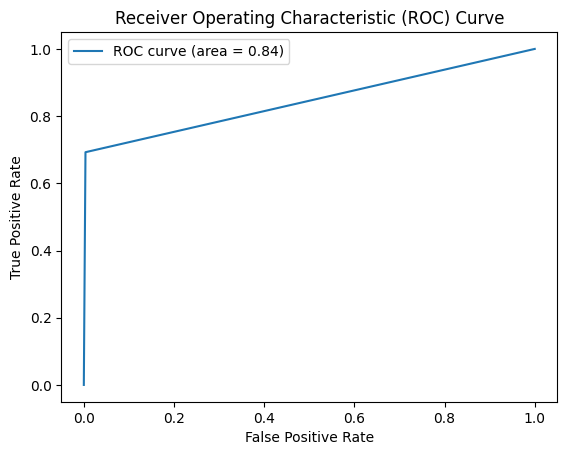

In [ ]:
#Confusion Matrix & ROC-AUC
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")

# Plot ROC curve (optional)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


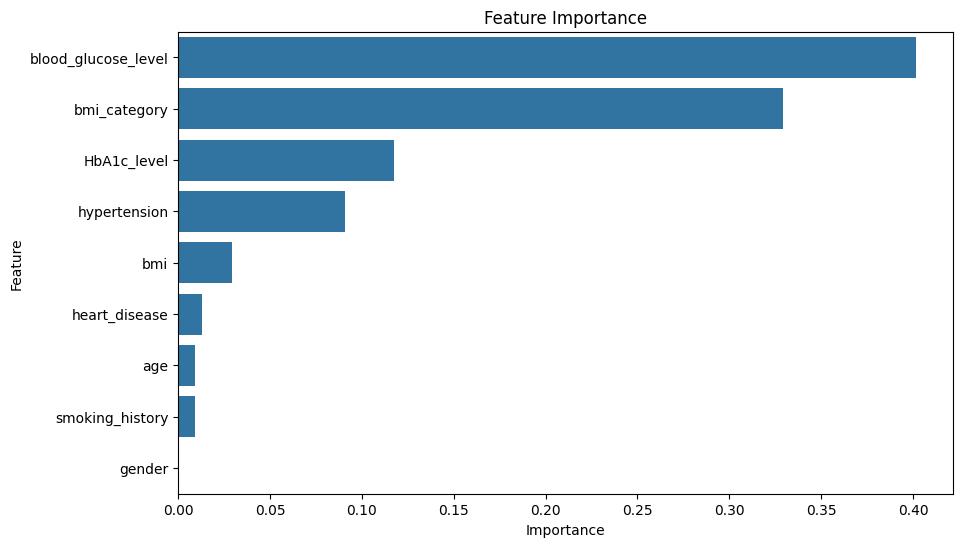

In [ ]:
#feature importance plot
importances = model.feature_importances_
feature_names = df.drop(columns=['diabetes']).columns

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


The removal of less important features did not display much improvements in model performance

In [ ]:
#RandomForestClassifier feature importances

feature_importances = model.feature_importances_
print(feature_importances)


[0.         0.00924199 0.09067631 0.01321017 0.00918487 0.02914567
 0.11738507 0.40175524 0.32940068]


Gender (0.00): This suggests that the gender feature has little to no importance in predicting diabetes in this model, possibly because the effect of gender is less pronounced than other features.

Age (0.0091): Age has a very small influence in predicting diabetes, though it does play a role.

Hypertension (0.0915): This feature has a more significant importance. The presence of hypertension is often associated with a higher risk of diabetes.

Heart Disease (0.0118): This also has a small impact on predicting diabetes, indicating a mild association.

Smoking History (0.0073): Smoking history plays a very minor role in prediction, though it might still have some influence in specific cases.

BMI (0.0291): BMI is an important feature but not the strongest. It may indirectly contribute by correlating with obesity, a risk factor for diabetes.

HbA1c Level (0.1148): This is one of the most important features. The HbA1c level is a well-known indicator for diagnosing diabetes, representing average blood sugar levels over time.

Blood Glucose Level (0.4195): This is the most important feature. As expected, blood glucose levels are critical in predicting diabetes.

BMI Category (One-Hot Encoded) (0.3165): BMI categories contribute significantly, reinforcing the importance of weight classification in identifying diabetes risks.

##Save and download the trained model

In [ ]:
from joblib import dump, load

# Save model with compression
dump(model, 'diabetes_model.pkl', compress=('xz', 3))

# Load compressed model
model = load('diabetes_model.pkl')


In [ ]:
#downlaod the pkl file
from google.colab import files
files.download('diabetes_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Load the model to make predictions on random data

In [ ]:
# Load the saved model
from joblib import load
loaded_model = load('diabetes_model.pkl')

# Create a sample data point (replace with your data)
new_data = pd.DataFrame({
    'gender': [1],  # Male (1), Female (0)
    'age': [50],
    'hypertension': [1],  # Yes (1), No (0)
    'heart_disease': [0],  # Yes (1), No (0)
    'smoking_history': [1],  # Never (0), Former (1), Current (2), Not Current (3), ever (4), No Info (5)
    'bmi': [25],
    'HbA1c_level': [6],
    'blood_glucose_level': [100],
    'bmi_category':[1]
})



prediction = loaded_model.predict(new_data)

if prediction[0] == 1:
  diabetes_status = 'Diabetic'
else:
  diabetes_status = 'Non-Diabetic'

print(f'Prediction: {prediction}')
print(f'Diabetes Status: {diabetes_status}')


Prediction: [1]
Diabetes Status: Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
